In [1]:
#Import all necessary modules
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import matplotlib.style
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from pylab import rcParams

<ipython-input-1-e167d345959c>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## About Data (Info, Shape,Summary Stats, Assumptions about data)

In [6]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MRA Capastone project/Sales_Data.xlsx', parse_dates=['ORDERDATE'])



In [8]:
# Reset specific options instead of all
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
# Or any other specific options you want to reset

# Set the desired max_columns value
pd.set_option('display.max_columns', 30)

In [9]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,1970-01-01,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,1970-01-01,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,1970-01-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,1970-01-01,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,1970-01-01,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [11]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ORDERNUMBER,2747.0,10259.761558,10100.0,10181.0,10264.0,10334.5,10425.0,91.877521
QUANTITYORDERED,2747.0,35.103021,6.0,27.0,35.0,43.0,97.0,9.762135
PRICEEACH,2747.0,101.098951,26.88,68.745,95.55,127.1,252.87,42.042548
ORDERLINENUMBER,2747.0,6.491081,1.0,3.0,6.0,9.0,18.0,4.230544
SALES,2747.0,3553.047583,482.13,2204.35,3184.8,4503.095,14082.8,1838.953901
ORDERDATE,2747,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,NaN
DAYS_SINCE_LASTORDER,2747.0,1757.085912,42.0,1077.0,1761.0,2436.5,3562.0,819.280576
MSRP,2747.0,100.691664,33.0,68.0,99.0,124.0,214.0,40.114802


In [12]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [13]:
df.shape

(2747, 20)

Now, we find which product line has maximum sales. Then we check countrywise sales. We conclude that highest sale was in 2004.Also find the country where  the highest sale is recorded in USA and Lowest is Ireland. We also find that product line having maximum sales in Cars.

In [14]:
# Check the format of your 'ORDERDATE' column
print(df['ORDERDATE'].head())

# Attempt to convert the 'ORDERDATE' column to datetime, handling potential errors
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Extract the year
df['year'] = df['ORDERDATE'].dt.year

# Check for missing values after conversion
print(df['year'].isnull().sum())

0   1970-01-01
1   1970-01-01
2   1970-01-01
3   1970-01-01
4   1970-01-01
Name: ORDERDATE, dtype: datetime64[ns]
0


In [15]:
df['year'] = pd.DatetimeIndex(df['ORDERDATE']).year

In [16]:
df['month'] = pd.DatetimeIndex(df['ORDERDATE']).month

In [17]:
df['quarter'] = df['ORDERDATE'].dt.to_period('Q')

In [18]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,year,month,quarter
0,10107,30,95.70,2,2871.00,1970-01-01,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,1970,1,1970Q1
1,10121,34,81.35,5,2765.90,1970-01-01,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,1970,1,1970Q1
2,10134,41,94.74,2,3884.34,1970-01-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,1970,1,1970Q1
3,10145,45,83.26,6,3746.70,1970-01-01,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,1970,1,1970Q1
4,10168,36,96.66,1,3479.76,1970-01-01,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,1970,1,1970Q1


In [19]:
df.nunique()

ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1844
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                  1
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
year                       1
month                      1
quarter                    1
dtype: int64

In [20]:
#Find sales Product line wise

(df.groupby('PRODUCTLINE')['SALES'].sum()).sort_values()

PRODUCTLINE
Trains               226243.47
Ships                700039.22
Planes               969323.42
Motorcycles         1103512.19
Trucks and Buses    1111559.19
Vintage Cars        1806675.68
Classic Cars        3842868.54
Name: SALES, dtype: float64

In [21]:
#Products that they deal in
df['PRODUCTLINE'].value_counts()

PRODUCTLINE
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: count, dtype: int64

In [22]:
#Country wise sales:

(df.groupby('COUNTRY')['SALES'].sum()).sort_values()

COUNTRY
Ireland          57756.43
Philippines      94015.73
Belgium         108412.62
Switzerland     117713.56
Japan           188167.81
Austria         202062.53
Sweden          210014.21
Germany         220472.09
Canada          224078.56
Denmark         245637.15
Singapore       288488.41
Norway          307463.70
Finland         329581.91
Italy           374674.31
UK              478880.46
Australia       630623.10
France         1110916.52
Spain          1215686.92
USA            3355575.69
Name: SALES, dtype: float64

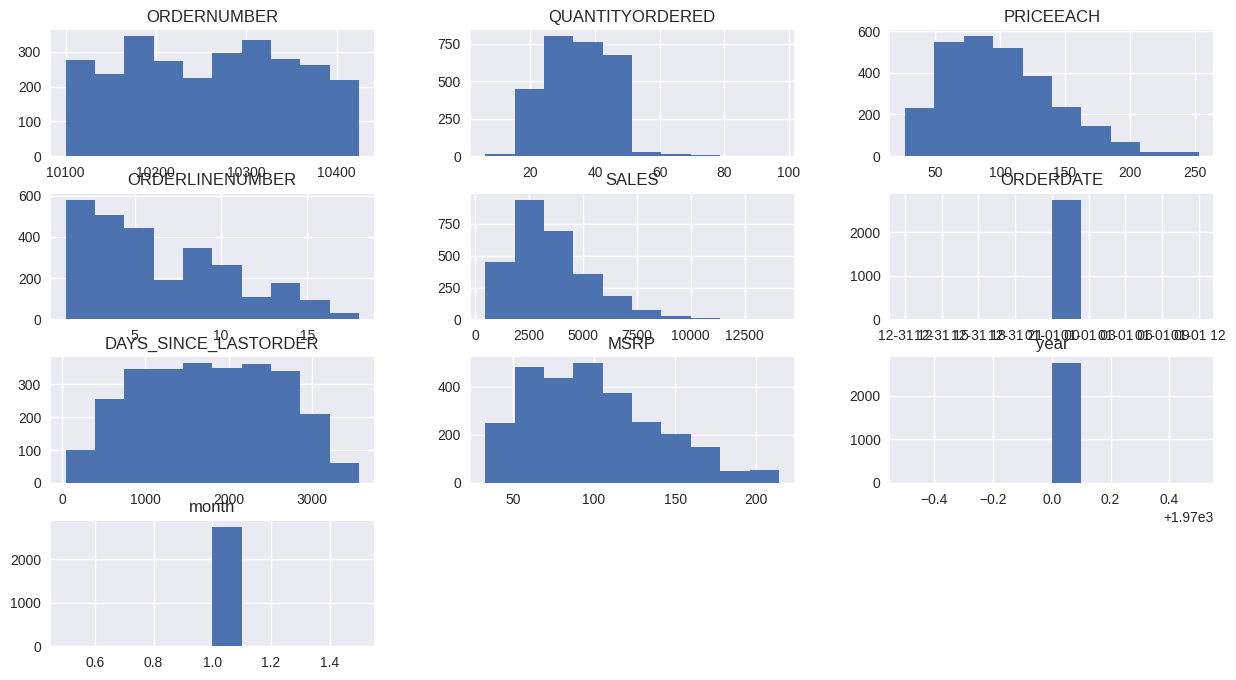

In [24]:
df.hist(figsize=(15,8));

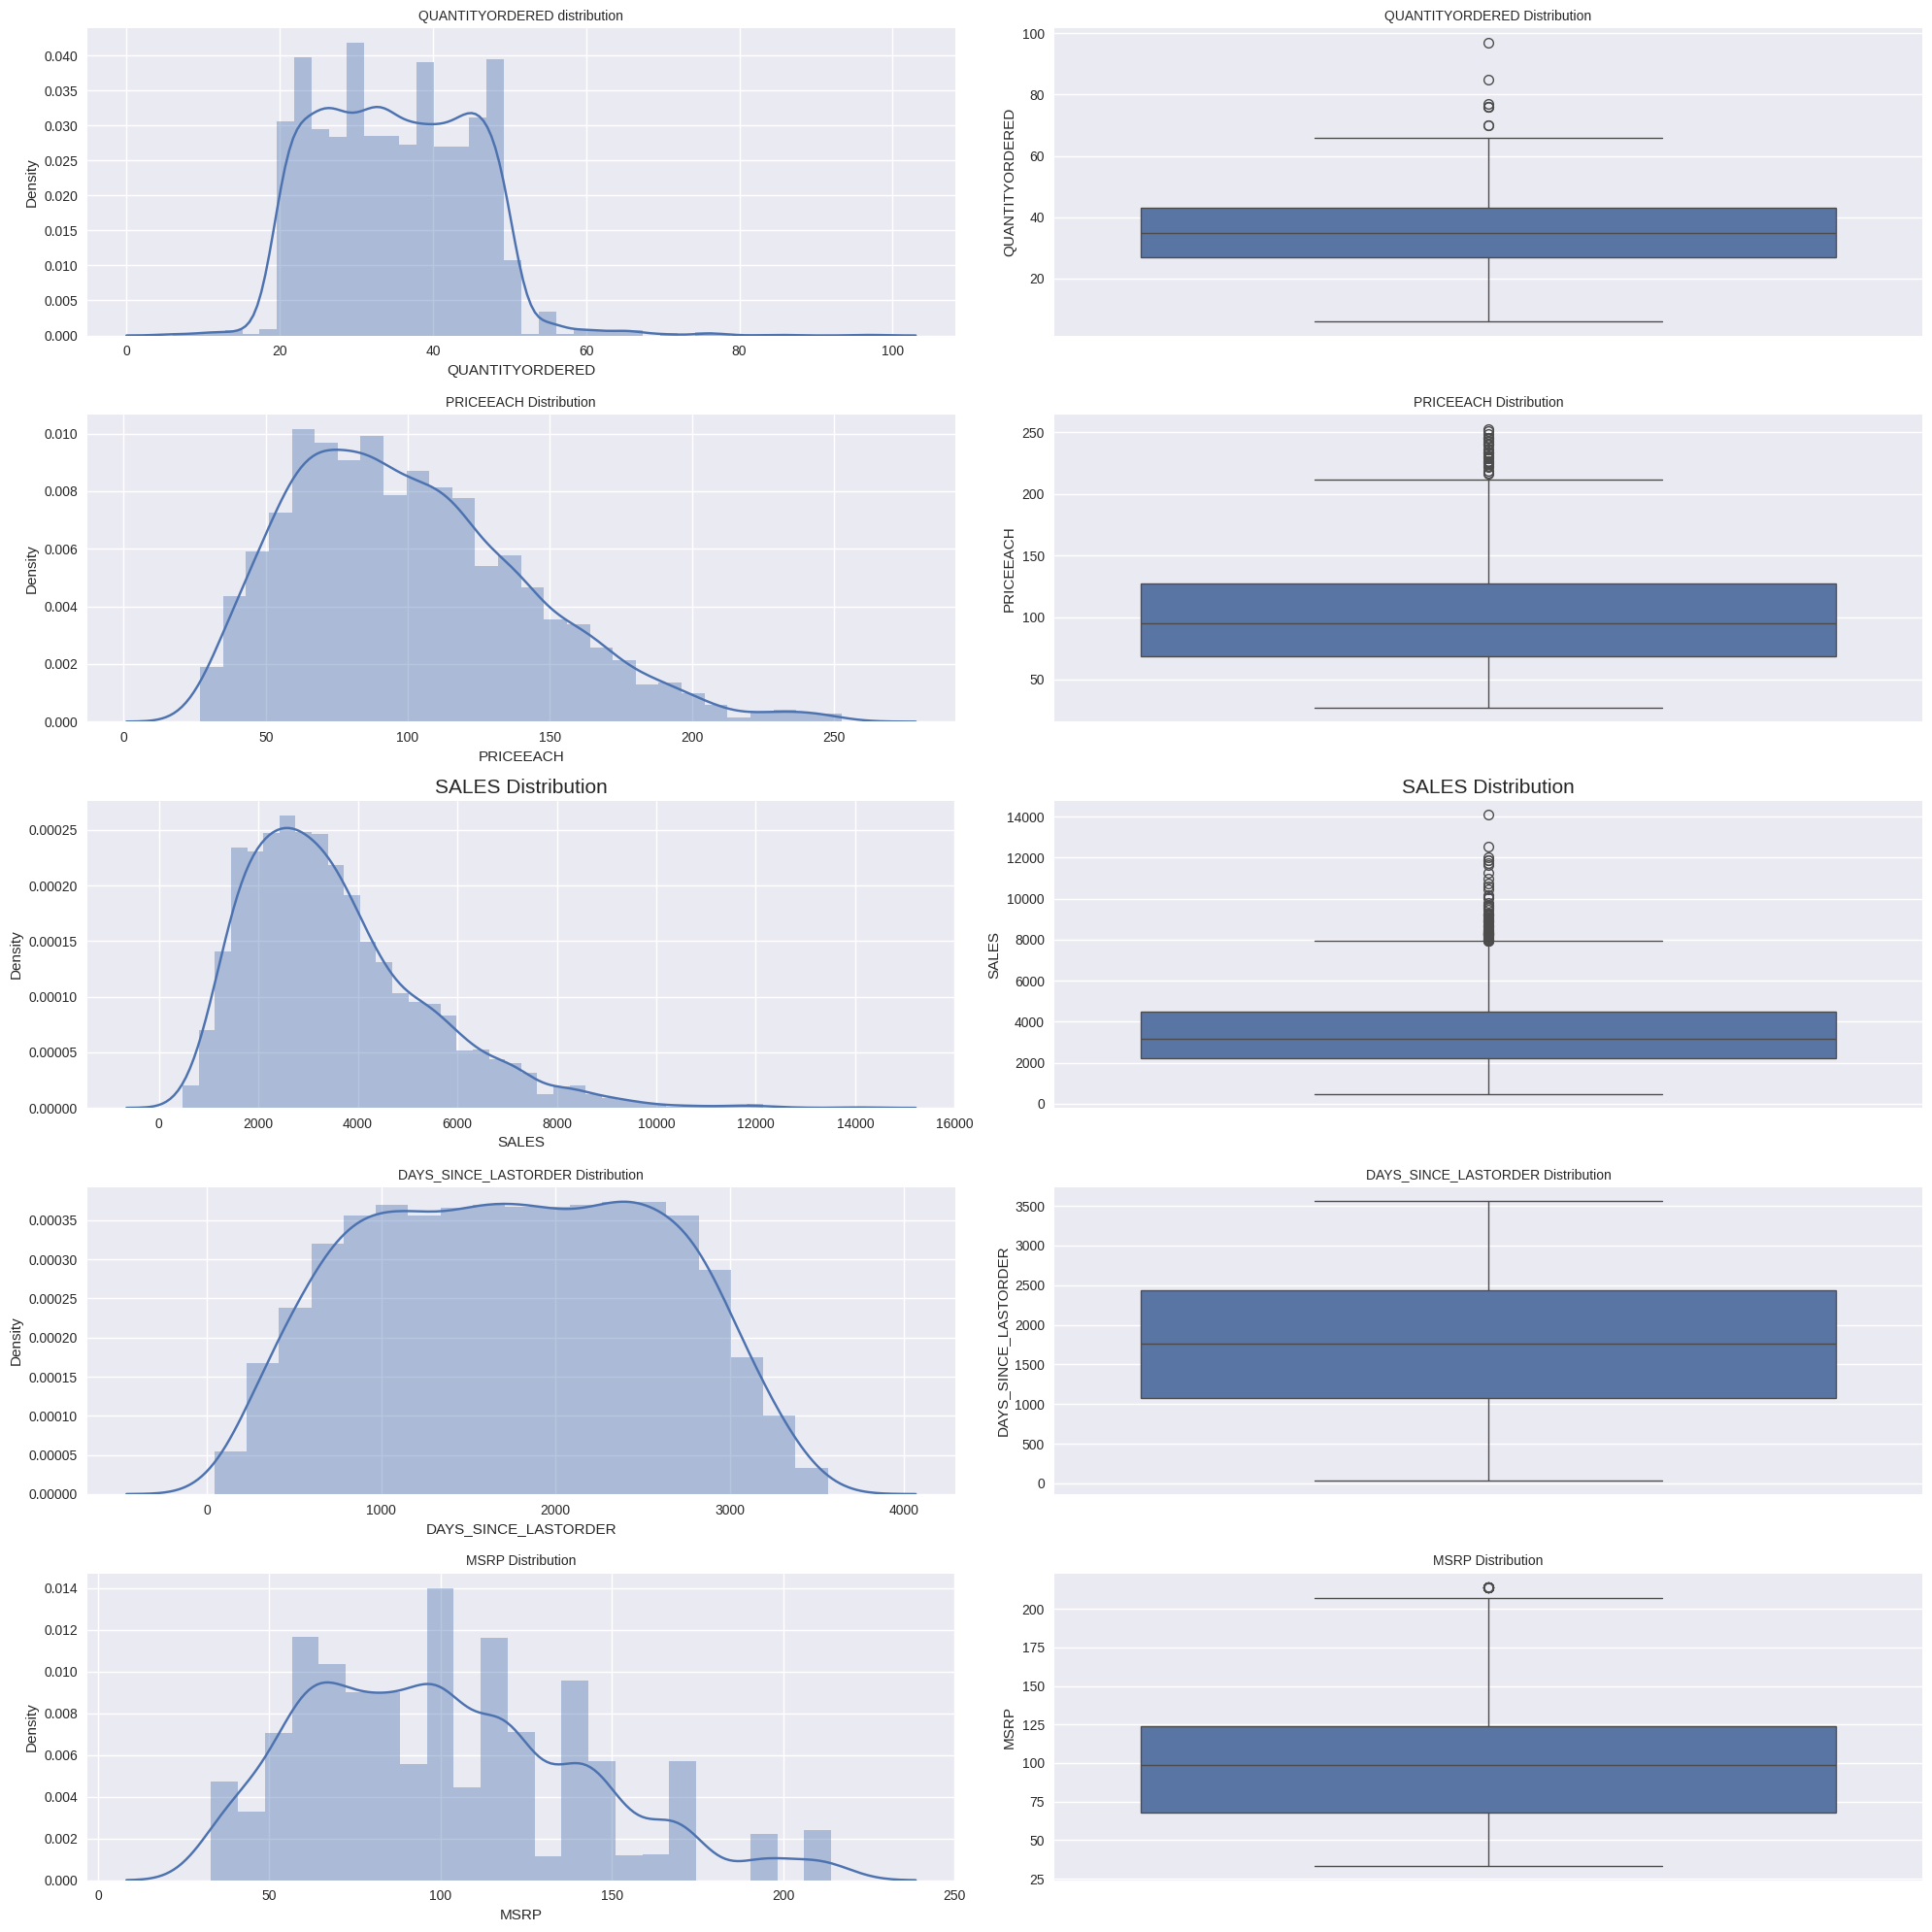

In [25]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,20)

a = sns.distplot(df['QUANTITYORDERED'] , ax=axes[0][0])
a.set_title("QUANTITYORDERED distribution",fontsize=10)

a = sns.boxplot(df['QUANTITYORDERED'] , orient = "v" , ax=axes[0][1])
a.set_title("QUANTITYORDERED Distribution",fontsize=10)

a = sns.distplot(df['PRICEEACH'] , ax=axes[1][0])
a.set_title("PRICEEACH Distribution",fontsize=10)

a = sns.boxplot(df['PRICEEACH'] , orient = "v" , ax=axes[1][1])
a.set_title("PRICEEACH Distribution",fontsize=10)

a = sns.distplot(df['SALES'] , ax=axes[2][0])
a.set_title("SALES Distribution",fontsize=15)

a = sns.boxplot(df['SALES'] , orient = "v" , ax=axes[2][1])
a.set_title("SALES Distribution",fontsize=15)


a = sns.distplot(df['DAYS_SINCE_LASTORDER'] , ax=axes[3][0])
a.set_title("DAYS_SINCE_LASTORDER Distribution",fontsize=10)

a = sns.boxplot(df['DAYS_SINCE_LASTORDER'] , orient = "v" , ax=axes[3][1])
a.set_title("DAYS_SINCE_LASTORDER Distribution",fontsize=10)

a = sns.distplot(df['MSRP'] , ax=axes[4][0])
a.set_title("MSRP Distribution",fontsize=10)

a = sns.boxplot(df['MSRP'] , orient = "v" , ax=axes[4][1])
a.set_title("MSRP Distribution",fontsize=10)

plt.tight_layout()
plt.show()

In [31]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  \
ORDERNUMBER              1.000000         0.067110  -0.003369   
QUANTITYORDERED          0.067110         1.000000   0.010161   
PRICEEACH               -0.003369         0.010161   1.000000   
ORDERLINENUMBER         -0.054300        -0.016295  -0.052646   
SALES                    0.037289         0.553359   0.808287   
DAYS_SINCE_LASTORDER    -0.251476        -0.021923  -0.397092   
MSRP                    -0.013910         0.020551   0.778393   
year                          NaN              NaN        NaN   
month                         NaN              NaN        NaN   

                      ORDERLINENUMBER     SALES  DAYS_SINCE_LASTORDER  \
ORDERNUMBER                 -0.054300  0.037289             -0.251476   
QUANTITYORDERED             -0.016295  0.553359             -0.021923   
PRICEEACH                   -0.052646  0.808287             -0.397092   
ORDERLINENUMBER              1.000000 -0.057414          

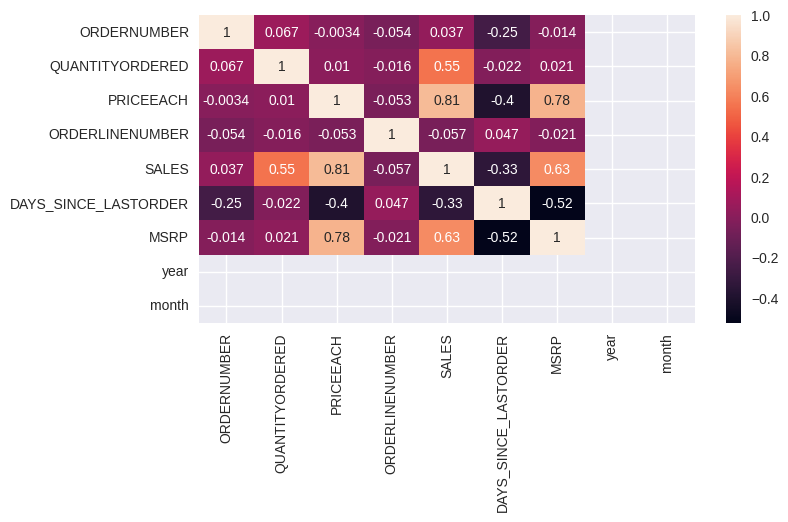

In [29]:
# Select only the numerical columns before calculating correlations
numerical_df = df.select_dtypes(include=['number'])
plt.subplots(figsize=(8,4))
sns.heatmap(numerical_df.corr(),annot = True);

ValueError: could not convert string to float: 'Shipped'

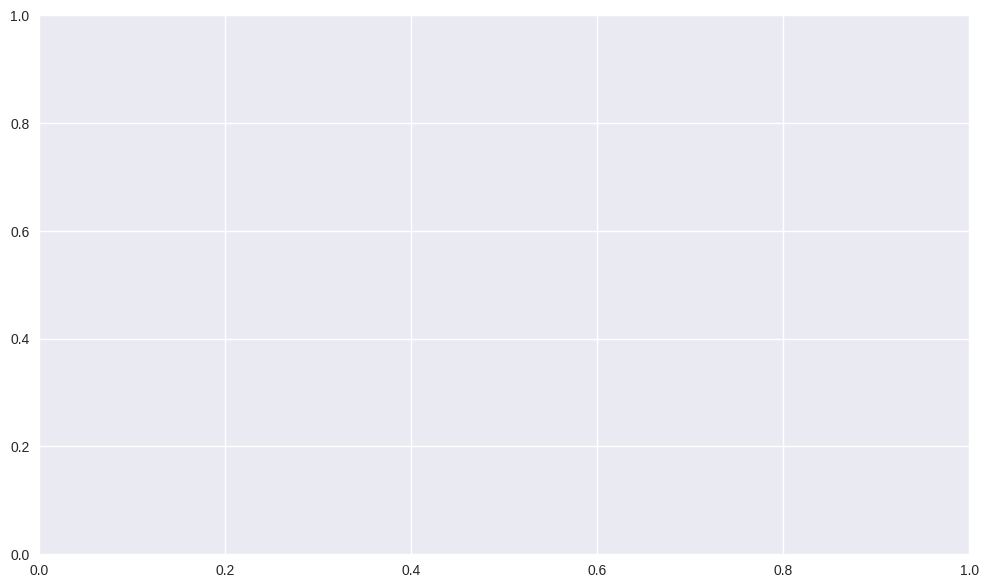

In [30]:
plt.subplots(figsize=(12,7))
sns.heatmap(df.corr(),annot = True);